In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from math import floor
%matplotlib inline

from matplotlib import animation
from IPython.display import HTML
plt.rcParams['figure.dpi'] = 80

import subprocess 
import os

path = "/home/muon02/Documents/Tesis/lgca_1d/build/"

In [2]:
def extrac_info(document):
    # Input
    data_file = document

    # Delimiter
    data_file_delimiter = ' '

    # The max column count a line in the file could have
    largest_column_count = 0

    # Loop the data lines
    with open(data_file, 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()

        for l in lines:
            # Count the column count for the current line
            column_count = len(l.split(data_file_delimiter)) + 1
        
            # Set the new most column count
            largest_column_count = column_count if largest_column_count < column_count else largest_column_count

    # Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
    column_names = [i for i in range(0, largest_column_count)]

    # Read csv
    df = pandas.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
    # print(df)
    df = df.fillna(0)
    df.drop(df.columns[-1], axis=1, inplace=True)
    return df

In [3]:
# parametros generales
nu = 0.7
alpha = 2
d = 0.05

In [4]:
def make_info(N_s, N_t, p_sym,time=30001):
    data_par_terminal = str(N_s) + " " + str(N_t) 
    data_par_terminal = data_par_terminal + " " + str(nu) + " " + str(alpha)
    data_par_terminal = data_par_terminal + " " + str(p_sym) + " " + str(d) 
    data_par_terminal = data_par_terminal + " " + str(time)
    subprocess.run("cd "+path+" && ./lgca 100 "+data_par_terminal, capture_output=True, shell=True)


    cellsCSC = extrac_info("ydataS"+str(N_s)+str(N_t)+str(floor(p_sym*10))+".csv")
    cellsTD = extrac_info("ydataT"+str(N_s)+str(N_t)+str(floor(p_sym*10))+".csv")

    os.remove("ydataS"+str(N_s)+str(N_t)+str(floor(p_sym*10))+".csv")
    os.remove("ydataT"+str(N_s)+str(N_t)+str(floor(p_sym*10))+".csv")
    
    return (cellsCSC,cellsTD)

# $D_S > D_T$

In [5]:
N_sS = 40
N_tS = 20

## $p>0.5$

In [6]:
p_asymmas = 0.7

In [7]:

cellsCSC_I,cellsTD_I = make_info(N_sS, N_tS, p_asymmas)

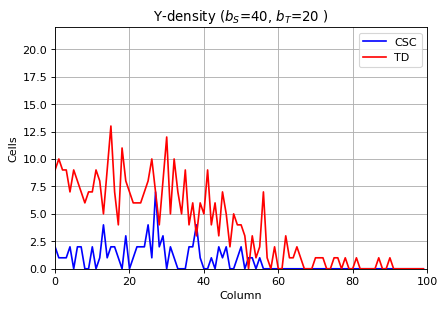

In [28]:
ylim = max(cellsCSC_I.values.max(),cellsTD_I.values.max())

fig, ax = plt.subplots()
ax.set(xlabel='Column', ylabel='Cells',
       title=r'Y-density ($b_S$='+str(N_sS)+', $b_T$='+str(N_tS)+' )', xlim=[0,100],ylim=[0,ylim])
ax.grid()
line1, = ax.plot([],[],'b-',label="CSC")
line2, = ax.plot([],[],'r-',label="TD")
plt.legend(loc="upper right")
def drawframe(n):
    line1.set_data(range(100),cellsCSC_I.iloc[n*200,0:100])
    line2.set_data(range(100),cellsTD_I.iloc[n*200,0:100])
    return (line1,line2)
anim = animation.FuncAnimation(fig, drawframe,
                               frames=range(50),blit=True)


HTML(anim.to_html5_video())

<Figure size 1920x960 with 0 Axes>

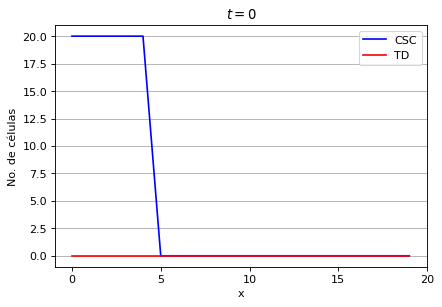

In [ ]:
t_esp = 10
plt.figure(figsize=(24, 12))

fig,ax = plt.subplots()

ax.plot(range(100),cellsCSC_I.iloc[t_esp,0:100],'b-',label="CSC")
ax.plot(range(100),cellsTD_I.iloc[t_esp,0:100],'r-',label="TD")

plt.legend(loc="upper right")
ax.set(xlabel=r'x', ylabel='No. de células',
       title=r'$t = %d $'%t_esp)
plt.grid(axis='y')
#plt.savefig('Stochastic%d%d%d_%d.png'%(N_s,N_t,alpha,t_esp), dpi=1080)
plt.show()

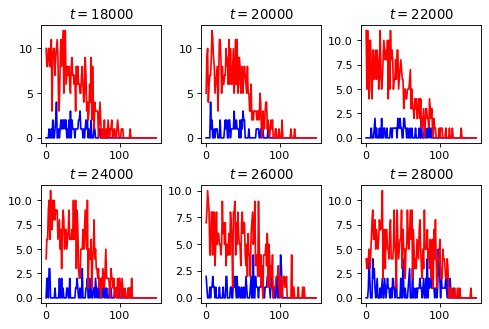

In [23]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, constrained_layout=True)

t_esp = 18000

ax1.plot(range(  150  ),cellsCSC_I.iloc[t_esp,0:  150  ],'b-',label="CSC")
ax1.plot(range(  150  ),cellsTD_I.iloc[t_esp,0:  150  ],'r-',label="TD")

ax1.set(title=r'$t = %d $'%t_esp)

## 2
t_esp = 20000

ax2.plot(range(  150  ),cellsCSC_I.iloc[t_esp,0:  150  ],'b-',label="CSC")
ax2.plot(range(  150  ),cellsTD_I.iloc[t_esp,0:  150  ],'r-',label="TD")

ax2.set(title=r'$t = %d $'%t_esp)

##3
t_esp = 22000

ax3.plot(range(  150  ),cellsCSC_I.iloc[t_esp,0:  150  ],'b-',label="CSC")
ax3.plot(range(  150  ),cellsTD_I.iloc[t_esp,0:  150  ],'r-',label="TD")

ax3.set(title=r'$t = %d $'%t_esp)

##4
t_esp = 24000

ax4.plot(range(  150  ),cellsCSC_I.iloc[t_esp,0:  150  ],'b-',label="CSC")
ax4.plot(range(  150  ),cellsTD_I.iloc[t_esp,0:  150  ],'r-',label="TD")

ax4.set(title=r'$t = %d $'%t_esp)

##5
t_esp =  26000

ax5.plot(range(  150  ),cellsCSC_I.iloc[t_esp,0:  150  ],'b-',label="CSC")
ax5.plot(range(  150  ),cellsTD_I.iloc[t_esp,0:  150  ],'r-',label="TD")

ax5.set(title=r'$t = %d $'%t_esp)

##6
t_esp = 28000

ax6.plot(range(  150  ),cellsCSC_I.iloc[t_esp,0:  150  ],'b-',label="CSC")
ax6.plot(range(  150  ),cellsTD_I.iloc[t_esp,0:  150  ],'r-',label="TD")

ax6.set(title=r'$t = %d $'%t_esp)

plt.savefig("Stochastic_Ic.png", dpi=720)

## $p < 0.5$

In [8]:
p_asymmenos = 0.4

In [9]:

cellsCSC_II,cellsTD_II = make_info(N_sS, N_tS, p_asymmenos)

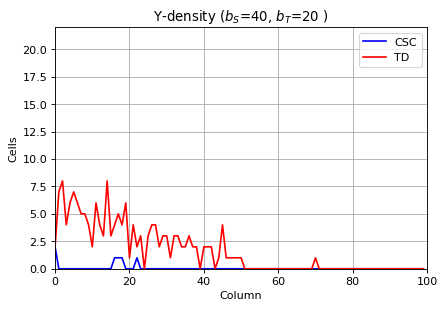

In [40]:
ylim = max(cellsCSC_II.values.max(),cellsTD_II.values.max())

fig, ax = plt.subplots()
ax.set(xlabel='Column', ylabel='Cells',
       title=r'Y-density ($b_S$='+str(N_sS)+', $b_T$='+str(N_tS)+' )', xlim=[0,100],ylim=[0,ylim])
ax.grid()
line1, = ax.plot([],[],'b-',label="CSC")
line2, = ax.plot([],[],'r-',label="TD")
plt.legend(loc="upper right")
def drawframe(n):
    line1.set_data(range(100),cellsCSC_II.iloc[n*200,0:100])
    line2.set_data(range(100),cellsTD_II.iloc[n*200,0:100])
    return (line1,line2)
anim = animation.FuncAnimation(fig, drawframe,
                               frames=range(50),blit=True)


HTML(anim.to_html5_video())

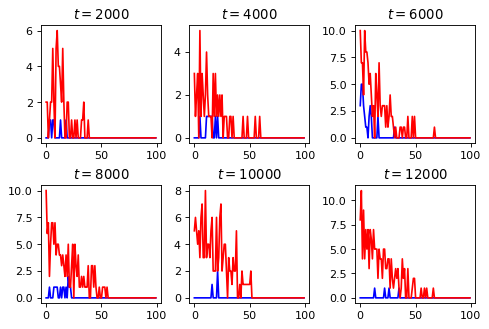

In [28]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, constrained_layout=True)

t_esp = 2000

ax1.plot(range(  100  ),cellsCSC_II.iloc[t_esp,0:  100  ],'b-',label="CSC")
ax1.plot(range(  100  ),cellsTD_II.iloc[t_esp,0:  100  ],'r-',label="TD")

ax1.set(title=r'$t = %d $'%t_esp)

## 2
t_esp = 4000

ax2.plot(range(  100  ),cellsCSC_II.iloc[t_esp,0:  100  ],'b-',label="CSC")
ax2.plot(range(  100  ),cellsTD_II.iloc[t_esp,0:  100  ],'r-',label="TD")

ax2.set(title=r'$t = %d $'%t_esp)

##3
t_esp = 6000

ax3.plot(range(  100  ),cellsCSC_II.iloc[t_esp,0:  100  ],'b-',label="CSC")
ax3.plot(range(  100  ),cellsTD_II.iloc[t_esp,0:  100  ],'r-',label="TD")

ax3.set(title=r'$t = %d $'%t_esp)

##4
t_esp = 8000

ax4.plot(range(  100  ),cellsCSC_II.iloc[t_esp,0:  100  ],'b-',label="CSC")
ax4.plot(range(  100  ),cellsTD_II.iloc[t_esp,0:  100  ],'r-',label="TD")

ax4.set(title=r'$t = %d $'%t_esp)

##5
t_esp =  10000

ax5.plot(range(  100  ),cellsCSC_II.iloc[t_esp,0:  100  ],'b-',label="CSC")
ax5.plot(range(  100  ),cellsTD_II.iloc[t_esp,0:  100  ],'r-',label="TD")

ax5.set(title=r'$t = %d $'%t_esp)

##6
t_esp = 12000

ax6.plot(range(  100  ),cellsCSC_II.iloc[t_esp,0:  100  ],'b-',label="CSC")
ax6.plot(range(  100  ),cellsTD_II.iloc[t_esp,0:  100  ],'r-',label="TD")

ax6.set(title=r'$t = %d $'%t_esp)

plt.savefig("Stochastic_IIc.png", dpi=720)

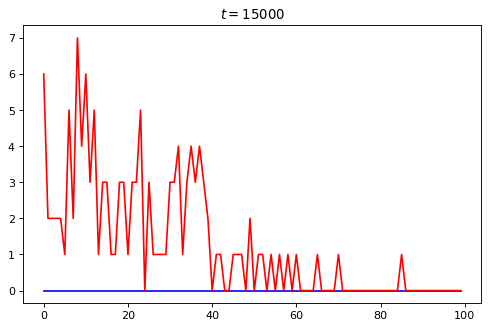

In [31]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, constrained_layout=True)

t_esp = 15000

ax1.plot(range(  100  ),cellsCSC_II.iloc[t_esp,0:  100  ],'b-',label="CSC")
ax1.plot(range(  100  ),cellsTD_II.iloc[t_esp,0:  100  ],'r-',label="TD")

ax1.set(title=r'$t = %d $'%t_esp)
plt.savefig("Stochastic_IIfinal.png", dpi=720)

# $D_S > D_T$

In [32]:
N_sT = 20
N_tT = 40

## $p>0.5$

In [33]:
p_asymmas = 0.7

In [34]:

cellsCSC_III,cellsTD_III = make_info(N_sT, N_tT, p_asymmas)

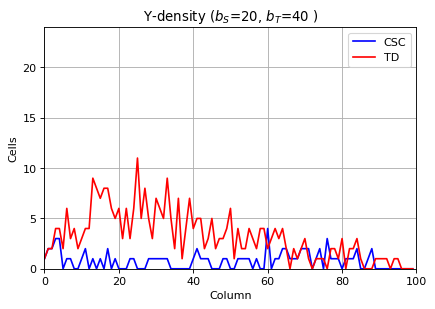

In [41]:
ylim = max(cellsCSC_III.values.max(),cellsTD_III.values.max())

fig, ax = plt.subplots()
ax.set(xlabel='Column', ylabel='Cells',
       title=r'Y-density ($b_S$='+str(N_sT)+', $b_T$='+str(N_tT)+' )', xlim=[0,100],ylim=[0,ylim])
ax.grid()
line1, = ax.plot([],[],'b-',label="CSC")
line2, = ax.plot([],[],'r-',label="TD")
plt.legend(loc="upper right")
def drawframe(n):
    line1.set_data(range(100),cellsCSC_III.iloc[n*200,0:100])
    line2.set_data(range(100),cellsTD_III.iloc[n*200,0:100])
    return (line1,line2)
anim = animation.FuncAnimation(fig, drawframe,
                               frames=range(50),blit=True)


HTML(anim.to_html5_video())

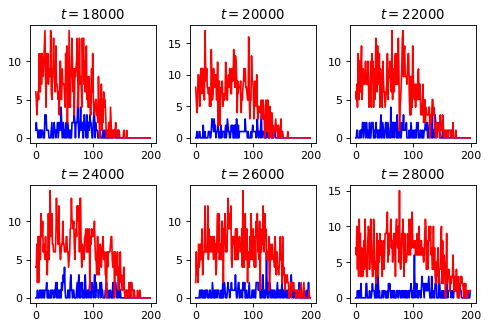

In [38]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, constrained_layout=True)

t_esp = 18000

ax1.plot(range(  200  ),cellsCSC_III.iloc[t_esp,0:  200  ],'b-',label="CSC")
ax1.plot(range(  200  ),cellsTD_III.iloc[t_esp,0:  200  ],'r-',label="TD")

ax1.set(title=r'$t = %d $'%t_esp)

## 2
t_esp = 20000

ax2.plot(range(  200  ),cellsCSC_III.iloc[t_esp,0:  200  ],'b-',label="CSC")
ax2.plot(range(  200  ),cellsTD_III.iloc[t_esp,0:  200  ],'r-',label="TD")

ax2.set(title=r'$t = %d $'%t_esp)

##3
t_esp = 22000

ax3.plot(range(  200  ),cellsCSC_III.iloc[t_esp,0:  200  ],'b-',label="CSC")
ax3.plot(range(  200  ),cellsTD_III.iloc[t_esp,0:  200  ],'r-',label="TD")

ax3.set(title=r'$t = %d $'%t_esp)

##4
t_esp = 24000

ax4.plot(range(  200  ),cellsCSC_III.iloc[t_esp,0:  200  ],'b-',label="CSC")
ax4.plot(range(  200  ),cellsTD_III.iloc[t_esp,0:  200  ],'r-',label="TD")

ax4.set(title=r'$t = %d $'%t_esp)

##5
t_esp =  26000

ax5.plot(range(  200  ),cellsCSC_III.iloc[t_esp,0:  200  ],'b-',label="CSC")
ax5.plot(range(  200  ),cellsTD_III.iloc[t_esp,0:  200  ],'r-',label="TD")

ax5.set(title=r'$t = %d $'%t_esp)

##6
t_esp = 28000

ax6.plot(range(  200  ),cellsCSC_III.iloc[t_esp,0:  200  ],'b-',label="CSC")
ax6.plot(range(  200  ),cellsTD_III.iloc[t_esp,0:  200  ],'r-',label="TD")

ax6.set(title=r'$t = %d $'%t_esp)

plt.savefig("Stochastic_IIIc.png", dpi=720)

## $p < 0.5$

In [39]:
p_asymmenos = 0.4

In [40]:

cellsCSC_IV,cellsTD_IV = make_info(N_sT, N_tT, p_asymmenos)

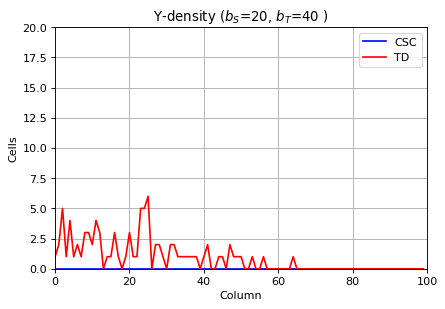

In [42]:
ylim = max(cellsCSC_IV.values.max(),cellsTD_IV.values.max())

fig, ax = plt.subplots()
ax.set(xlabel='Column', ylabel='Cells',
       title=r'Y-density ($b_S$='+str(N_sT)+', $b_T$='+str(N_tT)+' )', xlim=[0,100],ylim=[0,ylim])
ax.grid()
line1, = ax.plot([],[],'b-',label="CSC")
line2, = ax.plot([],[],'r-',label="TD")
plt.legend(loc="upper right")
def drawframe(n):
    line1.set_data(range(100),cellsCSC_IV.iloc[n*200,0:100])
    line2.set_data(range(100),cellsTD_IV.iloc[n*200,0:100])
    return (line1,line2)
anim = animation.FuncAnimation(fig, drawframe,
                               frames=range(50),blit=True)


HTML(anim.to_html5_video())

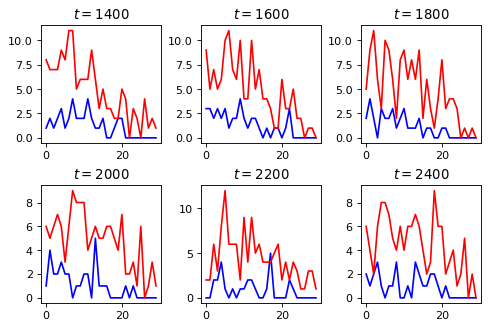

In [44]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, constrained_layout=True)

t_esp = 1400

ax1.plot(range(  30  ),cellsCSC_IV.iloc[t_esp,0:  30  ],'b-',label="CSC")
ax1.plot(range(  30  ),cellsTD_IV.iloc[t_esp,0:  30  ],'r-',label="TD")

ax1.set(title=r'$t = %d $'%t_esp)

## 2
t_esp = 1600

ax2.plot(range(  30  ),cellsCSC_IV.iloc[t_esp,0:  30  ],'b-',label="CSC")
ax2.plot(range(  30  ),cellsTD_IV.iloc[t_esp,0:  30  ],'r-',label="TD")

ax2.set(title=r'$t = %d $'%t_esp)

##3
t_esp = 1800

ax3.plot(range(  30  ),cellsCSC_IV.iloc[t_esp,0:  30  ],'b-',label="CSC")
ax3.plot(range(  30  ),cellsTD_IV.iloc[t_esp,0:  30  ],'r-',label="TD")

ax3.set(title=r'$t = %d $'%t_esp)

##4
t_esp = 2000

ax4.plot(range(  30  ),cellsCSC_IV.iloc[t_esp,0:  30  ],'b-',label="CSC")
ax4.plot(range(  30  ),cellsTD_IV.iloc[t_esp,0:  30  ],'r-',label="TD")

ax4.set(title=r'$t = %d $'%t_esp)

##5
t_esp =  2200

ax5.plot(range(  30  ),cellsCSC_IV.iloc[t_esp,0:  30  ],'b-',label="CSC")
ax5.plot(range(  30  ),cellsTD_IV.iloc[t_esp,0:  30  ],'r-',label="TD")

ax5.set(title=r'$t = %d $'%t_esp)

##6
t_esp = 2400

ax6.plot(range(  30  ),cellsCSC_IV.iloc[t_esp,0:  30  ],'b-',label="CSC")
ax6.plot(range(  30  ),cellsTD_IV.iloc[t_esp,0:  30  ],'r-',label="TD")

ax6.set(title=r'$t = %d $'%t_esp)

plt.savefig("Stochastic_IVb.png", dpi=720)

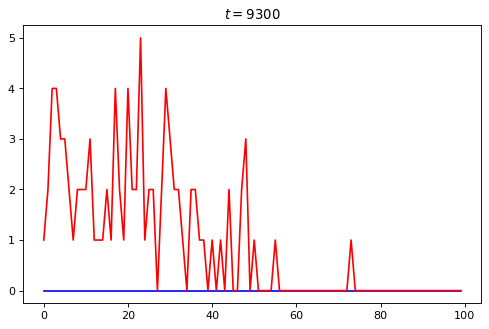

In [62]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, constrained_layout=True)

t_esp = 9300

ax1.plot(range(  100  ),cellsCSC_IV.iloc[t_esp,0:  100  ],'b-',label="CSC")
ax1.plot(range(  100  ),cellsTD_IV.iloc[t_esp,0:  100  ],'r-',label="TD")

ax1.set(title=r'$t = %d $'%t_esp)
plt.savefig("Stochastic_IVc.png", dpi=720)